In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/Colab Notebooks')

In [ ]:
import pytorch_optimizer as optim

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   24G   85G  22% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  841M  58% /usr/sbin/docker-init
tmpfs           6.4G   80K  6.4G   1% /var/colab
/dev/sda1        70G   42G   28G  61% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G     0   15G   0% /content/gdrive


In [ ]:
!ls /content/gdrive/'MyDrive'/datasets/

 emoji		      __MACOSX
 emoji2		      model-3classes-emoji2-resnet152-1epoch-accT065.pth
 ham10000	      model-3classes-emoji2-resnet152-3epoch-accT056.pth
 ham_100_X_test.pt    model-3classes-emoji2-resnet18-10epoch-acc060.pth
 ham_100_X_train.pt   model-3classes-emoji2-resnet18-20epoch-accT065.pth
 ham_100_y_test.pt    model-3classes-emoji2-resnet18-40epoch-accT065.pth
 ham_100_y_train.pt   model-3classes-emoji2-resnet34-10epoch-acc060.pth
 ham_224_X_test.pt    model-resnet50-clean-dirty.pth
 ham_224_X_train.pt   plates
 ham_224_y_test.pt    plates.zip
 ham_224_y_train.pt   UCMercedL
'IMDB Dataset.csv'


In [ ]:
import os

In [ ]:
print(os.listdir("../content/gdrive/MyDrive/datasets/UCMercedL/Images"))

['tenniscourt', 'storagetanks', 'sparseresidential', 'runway', 'river', 'parkinglot', 'overpass', 'mobilehomepark', 'mediumresidential', 'intersection', 'harbor', 'golfcourse', 'freeway', 'forest', 'denseresidential', 'chaparral', 'buildings', 'beach', 'baseballdiamond', 'airplane', 'agricultural']


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_root = '../content/gdrive/MyDrive/datasets/UCMercedL/'
print(os.listdir(data_root))

['Images', 'train', 'test']


In [ ]:
import shutil 
from tqdm import tqdm

train_dir = '../content/gdrive/MyDrive/datasets/UCMercedL/train'
val_dir = '../content/gdrive/MyDrive/datasets/UCMercedL/test'

In [ ]:
'''
import shutil 
from tqdm import tqdm

train_dir = 'train'
val_dir = 'test'

class_names = ['tenniscourt', 'storagetanks', 'sparseresidential', 'runway', 'river', 'parkinglot', 'overpass', 'mobilehomepark', 'mediumresidential', 'intersection', 'harbor', 'golfcourse', 'freeway', 'forest', 'denseresidential', 'chaparral', 'buildings', 'beach', 'baseballdiamond', 'airplane', 'agricultural']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 5 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

'''

100%|██████████| 85/85 [00:00<00:00, 448.96it/s]


In [ ]:
!ls

gdrive	sample_data  test  train


In [ ]:
!mv test ../content/gdrive/MyDrive/datasets/UCMercedL/

In [ ]:
!mv train ../content/gdrive/MyDrive/datasets/UCMercedL/

In [ ]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

In [102]:
from torchvision import transforms, models
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 18
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)

In [ ]:
len(train_dataloader), len(train_dataset)

(80, 1428)

In [ ]:
len(val_dataloader), len(val_dataset)

(20, 357)

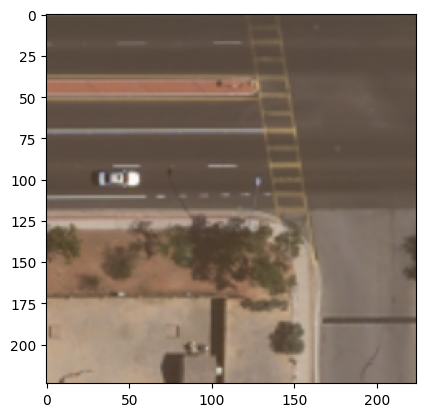

In [ ]:
X_batch, y_batch = next(iter(train_dataloader))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean);

In [ ]:
data_root = '../content/gdrive/MyDrive/datasets/UCMercedL/'
print(os.listdir(data_root))

['Images', 'train', 'test']


In [ ]:
class_names = train_dataset.classes

In [ ]:
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

X_batch, y_batch = next(iter(train_dataloader))

for x_item, y_item in zip(X_batch, y_batch):
    show_input(x_item, title=class_names[y_item])

Output hidden; open in https://colab.research.google.com to view.

In [103]:
def train_model(model, loss, optimizer, scheduler, num_epochs):
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                # statistics
                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)

    return model

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

In [ ]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

model.fc = torch.nn.Linear(model.fc.in_features, 21)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Adam

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
100%|██████████| 80/80 [00:17<00:00,  4.49it/s]

train Loss: 1.5695 Acc: 0.5396



100%|██████████| 20/20 [00:04<00:00,  4.97it/s]

val Loss: 1.5673 Acc: 0.6006
Epoch 1/9:



100%|██████████| 80/80 [00:19<00:00,  4.06it/s]

train Loss: 0.9938 Acc: 0.7049



100%|██████████| 20/20 [00:04<00:00,  4.15it/s]

val Loss: 0.6995 Acc: 0.7644
Epoch 2/9:



100%|██████████| 80/80 [00:18<00:00,  4.44it/s]

train Loss: 0.7858 Acc: 0.7590



100%|██████████| 20/20 [00:04<00:00,  4.42it/s]

val Loss: 0.9790 Acc: 0.6928
Epoch 3/9:



100%|██████████| 80/80 [00:19<00:00,  4.09it/s]

train Loss: 0.6980 Acc: 0.7785



100%|██████████| 20/20 [00:04<00:00,  4.79it/s]

val Loss: 0.4452 Acc: 0.8744
Epoch 4/9:



100%|██████████| 80/80 [00:18<00:00,  4.39it/s]

train Loss: 0.6048 Acc: 0.8243



100%|██████████| 20/20 [00:04<00:00,  4.01it/s]

val Loss: 0.7559 Acc: 0.8389
Epoch 5/9:



100%|██████████| 80/80 [00:18<00:00,  4.43it/s]

train Loss: 0.5656 Acc: 0.8201



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]

val Loss: 0.5182 Acc: 0.8411
Epoch 6/9:



100%|██████████| 80/80 [00:19<00:00,  4.15it/s]

train Loss: 0.4045 Acc: 0.8736



100%|██████████| 20/20 [00:05<00:00,  3.75it/s]

val Loss: 0.1857 Acc: 0.9272
Epoch 7/9:



100%|██████████| 80/80 [00:18<00:00,  4.44it/s]

train Loss: 0.3100 Acc: 0.9035



100%|██████████| 20/20 [00:04<00:00,  4.83it/s]

val Loss: 0.1321 Acc: 0.9633
Epoch 8/9:



100%|██████████| 80/80 [00:20<00:00,  4.00it/s]

train Loss: 0.2735 Acc: 0.9118



100%|██████████| 20/20 [00:04<00:00,  4.49it/s]

val Loss: 0.1289 Acc: 0.9606
Epoch 9/9:



100%|██████████| 80/80 [00:18<00:00,  4.42it/s]

train Loss: 0.2456 Acc: 0.9187



100%|██████████| 20/20 [00:04<00:00,  4.37it/s]

val Loss: 0.1235 Acc: 0.9522


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Adam

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowne

train Loss: 1.9998 Acc: 0.5583



100%|██████████| 18/18 [00:03<00:00,  5.24it/s]

val Loss: 1.3034 Acc: 0.8364
Epoch 1/9:



100%|██████████| 100/100 [00:12<00:00,  8.26it/s]

train Loss: 1.0504 Acc: 0.7989



100%|██████████| 18/18 [00:03<00:00,  5.21it/s]

val Loss: 0.7951 Acc: 0.8580
Epoch 2/9:



100%|██████████| 100/100 [00:12<00:00,  8.24it/s]

train Loss: 0.7772 Acc: 0.8411



100%|██████████| 18/18 [00:03<00:00,  5.26it/s]

val Loss: 0.5747 Acc: 0.8827
Epoch 3/9:



100%|██████████| 100/100 [00:12<00:00,  8.17it/s]

train Loss: 0.6405 Acc: 0.8561



100%|██████████| 18/18 [00:03<00:00,  5.49it/s]

val Loss: 0.4983 Acc: 0.9012
Epoch 4/9:



100%|██████████| 100/100 [00:12<00:00,  7.99it/s]

train Loss: 0.5634 Acc: 0.8733



100%|██████████| 18/18 [00:03<00:00,  5.34it/s]

val Loss: 0.4531 Acc: 0.9105
Epoch 5/9:



100%|██████████| 100/100 [00:12<00:00,  8.09it/s]

train Loss: 0.5224 Acc: 0.8728



100%|██████████| 18/18 [00:03<00:00,  5.29it/s]

val Loss: 0.3834 Acc: 0.9136
Epoch 6/9:



100%|██████████| 100/100 [00:12<00:00,  8.25it/s]

train Loss: 0.4867 Acc: 0.8828



100%|██████████| 18/18 [00:03<00:00,  4.85it/s]

val Loss: 0.3962 Acc: 0.9352
Epoch 7/9:



100%|██████████| 100/100 [00:11<00:00,  8.81it/s]

train Loss: 0.4468 Acc: 0.8906



100%|██████████| 18/18 [00:04<00:00,  4.45it/s]

val Loss: 0.3654 Acc: 0.9198
Epoch 8/9:



100%|██████████| 100/100 [00:10<00:00,  9.34it/s]

train Loss: 0.4901 Acc: 0.8867



100%|██████████| 18/18 [00:04<00:00,  3.83it/s]

val Loss: 0.4127 Acc: 0.9105
Epoch 9/9:



100%|██████████| 100/100 [00:12<00:00,  7.75it/s]

train Loss: 0.4816 Acc: 0.8828



100%|██████████| 18/18 [00:04<00:00,  4.25it/s]

val Loss: 0.3915 Acc: 0.9228


In [ ]:
#optimizer = torch.optim.SGD(net.parameters(), lr=5.0e-2)
#optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
#optimizer = optim.PNMBelief(net.parameters(), lr=0.001)
#optimizer = optim.YogiPNM(net.parameters())
#optimizer = optim.AdaBelief(net.parameters())
#optimizer = optim.DiffGrad(net.parameters())
#optimizer = optim.Yogi(net.parameters())

In [ ]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

model.fc = torch.nn.Linear(model.fc.in_features, 21)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = optim.DiffPNM(model.parameters(), lr=0.5e-3)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=2); #DiffPNM

Epoch 0/1:


  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 80/80 [00:28<00:00,  2.76it/s]

train Loss: 0.1509 Acc: 0.9556



100%|██████████| 20/20 [00:05<00:00,  3.99it/s]

val Loss: 0.0490 Acc: 0.9806
Epoch 1/1:



100%|██████████| 80/80 [00:21<00:00,  3.74it/s]

train Loss: 0.1423 Acc: 0.9590



100%|██████████| 20/20 [00:03<00:00,  5.03it/s]

val Loss: 0.0364 Acc: 0.9861


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Yogi

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 2.3136 Acc: 0.4410



100%|██████████| 20/20 [00:05<00:00,  3.74it/s]

val Loss: 0.5474 Acc: 0.8428
Epoch 1/9:



100%|██████████| 80/80 [00:18<00:00,  4.37it/s]

train Loss: 0.6733 Acc: 0.8000



100%|██████████| 20/20 [00:04<00:00,  4.88it/s]

val Loss: 0.2354 Acc: 0.9333
Epoch 2/9:



100%|██████████| 80/80 [00:19<00:00,  4.03it/s]

train Loss: 0.5075 Acc: 0.8521



100%|██████████| 20/20 [00:05<00:00,  3.97it/s]

val Loss: 0.2972 Acc: 0.9072
Epoch 3/9:



100%|██████████| 80/80 [00:18<00:00,  4.43it/s]

train Loss: 0.4343 Acc: 0.8743



100%|██████████| 20/20 [00:04<00:00,  4.83it/s]

val Loss: 0.3098 Acc: 0.9000
Epoch 4/9:



100%|██████████| 80/80 [00:20<00:00,  3.98it/s]

train Loss: 0.4392 Acc: 0.8799



100%|██████████| 20/20 [00:04<00:00,  4.88it/s]

val Loss: 0.3064 Acc: 0.9361
Epoch 5/9:



100%|██████████| 80/80 [00:18<00:00,  4.37it/s]

train Loss: 0.4334 Acc: 0.8861



100%|██████████| 20/20 [00:04<00:00,  4.47it/s]

val Loss: 0.1626 Acc: 0.9556
Epoch 6/9:



100%|██████████| 80/80 [00:18<00:00,  4.26it/s]

train Loss: 0.2627 Acc: 0.9146



100%|██████████| 20/20 [00:04<00:00,  4.78it/s]

val Loss: 0.0751 Acc: 0.9750
Epoch 7/9:



100%|██████████| 80/80 [00:19<00:00,  4.17it/s]

train Loss: 0.1943 Acc: 0.9444



100%|██████████| 20/20 [00:05<00:00,  3.52it/s]

val Loss: 0.0473 Acc: 0.9806
Epoch 8/9:



100%|██████████| 80/80 [00:18<00:00,  4.42it/s]

train Loss: 0.1795 Acc: 0.9458



100%|██████████| 20/20 [00:04<00:00,  4.92it/s]

val Loss: 0.0391 Acc: 0.9889
Epoch 9/9:



100%|██████████| 80/80 [00:20<00:00,  3.92it/s]

train Loss: 0.1647 Acc: 0.9458



100%|██████████| 20/20 [00:04<00:00,  4.58it/s]

val Loss: 0.0446 Acc: 0.9806


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #DiffGrad

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 1.3848 Acc: 0.6139



100%|██████████| 20/20 [00:04<00:00,  4.77it/s]

val Loss: 0.4416 Acc: 0.8806
Epoch 1/9:



100%|██████████| 80/80 [00:21<00:00,  3.69it/s]

train Loss: 0.6437 Acc: 0.7993



100%|██████████| 20/20 [00:04<00:00,  4.67it/s]

val Loss: 0.1962 Acc: 0.9472
Epoch 2/9:



100%|██████████| 80/80 [00:19<00:00,  4.05it/s]

train Loss: 0.4719 Acc: 0.8521



100%|██████████| 20/20 [00:05<00:00,  3.53it/s]

val Loss: 0.3268 Acc: 0.9111
Epoch 3/9:



100%|██████████| 80/80 [00:19<00:00,  4.03it/s]

train Loss: 0.4893 Acc: 0.8556



100%|██████████| 20/20 [00:04<00:00,  4.66it/s]

val Loss: 0.3406 Acc: 0.9078
Epoch 4/9:



100%|██████████| 80/80 [00:21<00:00,  3.69it/s]

train Loss: 0.3575 Acc: 0.8896



100%|██████████| 20/20 [00:04<00:00,  4.62it/s]

val Loss: 0.1255 Acc: 0.9694
Epoch 5/9:



100%|██████████| 80/80 [00:19<00:00,  4.10it/s]

train Loss: 0.3019 Acc: 0.9062



100%|██████████| 20/20 [00:05<00:00,  3.37it/s]

val Loss: 0.2516 Acc: 0.9167
Epoch 6/9:



100%|██████████| 80/80 [00:19<00:00,  4.03it/s]

train Loss: 0.2314 Acc: 0.9299



100%|██████████| 20/20 [00:04<00:00,  4.94it/s]

val Loss: 0.0521 Acc: 0.9806
Epoch 7/9:



100%|██████████| 80/80 [00:21<00:00,  3.71it/s]

train Loss: 0.1843 Acc: 0.9493



100%|██████████| 20/20 [00:04<00:00,  4.66it/s]

val Loss: 0.0415 Acc: 0.9833
Epoch 8/9:



100%|██████████| 80/80 [00:19<00:00,  4.01it/s]

train Loss: 0.1526 Acc: 0.9556



100%|██████████| 20/20 [00:05<00:00,  3.59it/s]

val Loss: 0.0419 Acc: 0.9861
Epoch 9/9:



100%|██████████| 80/80 [00:20<00:00,  3.82it/s]

train Loss: 0.1758 Acc: 0.9410



100%|██████████| 20/20 [00:04<00:00,  4.81it/s]

val Loss: 0.0409 Acc: 0.9861


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #PNMBelief

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 1.4013 Acc: 0.6007



100%|██████████| 20/20 [00:05<00:00,  3.97it/s]

val Loss: 0.7051 Acc: 0.8044
Epoch 1/9:



100%|██████████| 80/80 [00:19<00:00,  4.19it/s]

train Loss: 0.6932 Acc: 0.7861



100%|██████████| 20/20 [00:04<00:00,  4.45it/s]

val Loss: 0.3937 Acc: 0.8739
Epoch 2/9:



100%|██████████| 80/80 [00:19<00:00,  4.03it/s]

train Loss: 0.5481 Acc: 0.8333



100%|██████████| 20/20 [00:04<00:00,  4.80it/s]

val Loss: 0.3492 Acc: 0.9022
Epoch 3/9:



100%|██████████| 80/80 [00:20<00:00,  3.83it/s]

train Loss: 0.3942 Acc: 0.8757



100%|██████████| 20/20 [00:04<00:00,  4.21it/s]

val Loss: 0.2554 Acc: 0.9250
Epoch 4/9:



100%|██████████| 80/80 [00:19<00:00,  4.12it/s]

train Loss: 0.4034 Acc: 0.8785



100%|██████████| 20/20 [00:04<00:00,  4.13it/s]

val Loss: 0.2116 Acc: 0.9417
Epoch 5/9:



100%|██████████| 80/80 [00:19<00:00,  4.07it/s]

train Loss: 0.3989 Acc: 0.8792



100%|██████████| 20/20 [00:04<00:00,  4.68it/s]

val Loss: 0.1448 Acc: 0.9494
Epoch 6/9:



100%|██████████| 80/80 [00:21<00:00,  3.79it/s]

train Loss: 0.2320 Acc: 0.9361



100%|██████████| 20/20 [00:04<00:00,  4.33it/s]

val Loss: 0.0917 Acc: 0.9639
Epoch 7/9:



100%|██████████| 80/80 [00:19<00:00,  4.15it/s]

train Loss: 0.1973 Acc: 0.9403



100%|██████████| 20/20 [00:04<00:00,  4.10it/s]

val Loss: 0.0750 Acc: 0.9778
Epoch 8/9:



100%|██████████| 80/80 [00:19<00:00,  4.04it/s]

train Loss: 0.1909 Acc: 0.9451



100%|██████████| 20/20 [00:04<00:00,  4.62it/s]

val Loss: 0.0721 Acc: 0.9778
Epoch 9/9:



100%|██████████| 80/80 [00:21<00:00,  3.77it/s]

train Loss: 0.1523 Acc: 0.9542



100%|██████████| 20/20 [00:04<00:00,  4.61it/s]

val Loss: 0.0640 Acc: 0.9833


In [ ]:
preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
y_test = pd.Series()
for inputs, labels in tqdm(val_dataloader):
    inputs = inputs.to(device)
    optimizer.zero_grad()
    y_test = pd.concat([y_test, pd.Series(labels)])
    with torch.set_grad_enabled(False):
        pred = model(inputs)
        #m = torch.nn.Softmax(dim=1)
        #preds = pd.Series(pred.argmax(dim=1))
        preds = pd.concat([preds, pd.Series(pred.to('cpu').argmax(dim=1))])

<ipython-input-59-d780da8d061b>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
<ipython-input-59-d780da8d061b>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test = pd.Series()
  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_m

In [ ]:
(torch.tensor(preds.tolist()) == torch.tensor(y_test.tolist())).float().mean().item()

0.9859943985939026

In [ ]:
APreds = pd.DataFrame()

In [ ]:
APreds['Adam'] = preds

In [ ]:
APreds['Yogi'] = preds

In [ ]:
APreds['DiffGrad'] = preds

In [ ]:
APreds['PNMBelief'] = preds

In [ ]:
APreds['DiffPNM'] = preds.tolist()

In [ ]:
APreds

,Adam,Yogi,DiffGrad,PNMBelief,DiffPNM
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,11
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
352,20,20,20,20,20
353,20,20,20,20,20
354,12,20,20,20,20
355,20,20,20,20,20


In [ ]:
APreds = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/uc_lands_resnet.csv')
APreds = APreds.drop(['Unnamed: 0'], axis=1)

In [ ]:
APreds.to_csv('/content/gdrive/MyDrive/Colab Notebooks/uc_lands_resnet.csv')

In [ ]:
APreds

,Adam,Yogi,DiffGrad,PNMBelief,DiffPNM
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
352,20,20,20,20,20
353,20,20,20,20,20
354,12,20,20,20,20
355,20,20,20,20,20


In [ ]:
data = np.zeros((357,21), dtype=int)
ARes = pd.DataFrame(data)

In [ ]:
for i in range(357):
    for j in range(5):
        if j == 0:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.95238
        if j == 1:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.98039
        if j == 2:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.9823
        if j == 3:
            ARes.iloc[i, APreds.iloc[i, j]] += 0 #0.98319
        if j == 4:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.98399

In [ ]:
anslist = ARes.idxmax(axis=1)
(torch.tensor(anslist) == torch.tensor(y_test.tolist())).float().mean().item()

0.994397759437561

# DenseNet

In [64]:
from torchvision.models import densenet121, DenseNet121_Weights

In [104]:
model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.5e-3)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [105]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Adam

Epoch 0/9:


100%|██████████| 80/80 [00:20<00:00,  3.96it/s]

train Loss: 1.8284 Acc: 0.5938



100%|██████████| 20/20 [00:04<00:00,  4.72it/s]

val Loss: 0.5064 Acc: 0.8489
Epoch 1/9:



100%|██████████| 80/80 [00:21<00:00,  3.72it/s]

train Loss: 0.6642 Acc: 0.7958



100%|██████████| 20/20 [00:04<00:00,  4.54it/s]

val Loss: 0.4072 Acc: 0.8778
Epoch 2/9:



100%|██████████| 80/80 [00:19<00:00,  4.02it/s]

train Loss: 0.5481 Acc: 0.8333



100%|██████████| 20/20 [00:05<00:00,  3.87it/s]

val Loss: 0.3378 Acc: 0.9083
Epoch 3/9:



100%|██████████| 80/80 [00:20<00:00,  3.84it/s]

train Loss: 0.4405 Acc: 0.8688



100%|██████████| 20/20 [00:04<00:00,  4.74it/s]

val Loss: 0.3716 Acc: 0.8833
Epoch 4/9:



100%|██████████| 80/80 [00:21<00:00,  3.76it/s]

train Loss: 0.4115 Acc: 0.8618



100%|██████████| 20/20 [00:04<00:00,  4.43it/s]

val Loss: 0.2227 Acc: 0.9306
Epoch 5/9:



100%|██████████| 80/80 [00:19<00:00,  4.06it/s]

train Loss: 0.3811 Acc: 0.8771



100%|██████████| 20/20 [00:04<00:00,  4.42it/s]

val Loss: 0.2391 Acc: 0.9244
Epoch 6/9:



100%|██████████| 80/80 [00:21<00:00,  3.67it/s]

train Loss: 0.2623 Acc: 0.9201



100%|██████████| 20/20 [00:04<00:00,  4.85it/s]

val Loss: 0.1035 Acc: 0.9750
Epoch 7/9:



100%|██████████| 80/80 [00:20<00:00,  3.81it/s]

train Loss: 0.1966 Acc: 0.9396



100%|██████████| 20/20 [00:04<00:00,  4.35it/s]

val Loss: 0.1011 Acc: 0.9667
Epoch 8/9:



100%|██████████| 80/80 [00:19<00:00,  4.04it/s]

train Loss: 0.2001 Acc: 0.9431



100%|██████████| 20/20 [00:04<00:00,  4.21it/s]

val Loss: 0.0888 Acc: 0.9667
Epoch 9/9:



100%|██████████| 80/80 [00:22<00:00,  3.60it/s]

train Loss: 0.2079 Acc: 0.9389



100%|██████████| 20/20 [00:04<00:00,  4.81it/s]

val Loss: 0.0728 Acc: 0.9861


In [125]:
model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = optim.DiffGrad(model.parameters(), lr=0.5e-3)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [117]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Yogi

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 5.5899 Acc: 0.2403



100%|██████████| 20/20 [00:05<00:00,  3.52it/s]

val Loss: 1.1512 Acc: 0.7417
Epoch 1/9:



100%|██████████| 80/80 [00:22<00:00,  3.50it/s]

train Loss: 0.8957 Acc: 0.7993



100%|██████████| 20/20 [00:04<00:00,  4.51it/s]

val Loss: 0.3307 Acc: 0.8856
Epoch 2/9:



100%|██████████| 80/80 [00:23<00:00,  3.46it/s]

train Loss: 0.4869 Acc: 0.8708



100%|██████████| 20/20 [00:04<00:00,  4.56it/s]

val Loss: 0.1609 Acc: 0.9472
Epoch 3/9:



100%|██████████| 80/80 [00:23<00:00,  3.40it/s]

train Loss: 0.3718 Acc: 0.8951



100%|██████████| 20/20 [00:04<00:00,  4.61it/s]

val Loss: 0.1830 Acc: 0.9417
Epoch 4/9:



100%|██████████| 80/80 [00:24<00:00,  3.22it/s]

train Loss: 0.2842 Acc: 0.9208



100%|██████████| 20/20 [00:05<00:00,  3.83it/s]

val Loss: 0.1556 Acc: 0.9472
Epoch 5/9:



100%|██████████| 80/80 [00:21<00:00,  3.67it/s]

train Loss: 0.2886 Acc: 0.9104



100%|██████████| 20/20 [00:05<00:00,  3.43it/s]

val Loss: 0.1199 Acc: 0.9639
Epoch 6/9:



100%|██████████| 80/80 [00:21<00:00,  3.69it/s]

train Loss: 0.2026 Acc: 0.9375



100%|██████████| 20/20 [00:10<00:00,  1.94it/s]

val Loss: 0.0797 Acc: 0.9722
Epoch 7/9:



100%|██████████| 80/80 [00:21<00:00,  3.69it/s]

train Loss: 0.1685 Acc: 0.9500



100%|██████████| 20/20 [00:04<00:00,  4.78it/s]

val Loss: 0.0688 Acc: 0.9722
Epoch 8/9:



100%|██████████| 80/80 [00:22<00:00,  3.51it/s]

train Loss: 0.1700 Acc: 0.9493



100%|██████████| 20/20 [00:04<00:00,  4.64it/s]

val Loss: 0.0734 Acc: 0.9861
Epoch 9/9:



100%|██████████| 80/80 [00:23<00:00,  3.41it/s]

train Loss: 0.1507 Acc: 0.9618



100%|██████████| 20/20 [00:04<00:00,  4.27it/s]

val Loss: 0.0689 Acc: 0.9833


In [126]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #DiffGrad

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 2.0159 Acc: 0.6236



100%|██████████| 20/20 [00:04<00:00,  4.60it/s]

val Loss: 0.4074 Acc: 0.8883
Epoch 1/9:



100%|██████████| 80/80 [00:27<00:00,  2.92it/s]

train Loss: 0.4463 Acc: 0.8715



100%|██████████| 20/20 [00:04<00:00,  4.61it/s]

val Loss: 0.2044 Acc: 0.9306
Epoch 2/9:



100%|██████████| 80/80 [00:26<00:00,  3.03it/s]

train Loss: 0.3674 Acc: 0.8799



100%|██████████| 20/20 [00:04<00:00,  4.53it/s]

val Loss: 0.1829 Acc: 0.9356
Epoch 3/9:



100%|██████████| 80/80 [00:26<00:00,  3.02it/s]

train Loss: 0.3370 Acc: 0.8993



100%|██████████| 20/20 [00:04<00:00,  4.57it/s]

val Loss: 0.2590 Acc: 0.9083
Epoch 4/9:



100%|██████████| 80/80 [00:28<00:00,  2.80it/s]

train Loss: 0.3466 Acc: 0.8986



100%|██████████| 20/20 [00:04<00:00,  4.49it/s]

val Loss: 0.1745 Acc: 0.9417
Epoch 5/9:



100%|██████████| 80/80 [00:25<00:00,  3.09it/s]

train Loss: 0.2871 Acc: 0.9056



100%|██████████| 20/20 [00:04<00:00,  4.80it/s]

val Loss: 0.1335 Acc: 0.9633
Epoch 6/9:



100%|██████████| 80/80 [00:26<00:00,  3.04it/s]

train Loss: 0.1809 Acc: 0.9479



100%|██████████| 20/20 [00:04<00:00,  4.65it/s]

val Loss: 0.0871 Acc: 0.9744
Epoch 7/9:



100%|██████████| 80/80 [00:25<00:00,  3.11it/s]

train Loss: 0.1799 Acc: 0.9458



100%|██████████| 20/20 [00:04<00:00,  4.47it/s]

val Loss: 0.0766 Acc: 0.9772
Epoch 8/9:



100%|██████████| 80/80 [00:25<00:00,  3.11it/s]

train Loss: 0.1436 Acc: 0.9576



100%|██████████| 20/20 [00:04<00:00,  4.63it/s]

val Loss: 0.0670 Acc: 0.9778
Epoch 9/9:



100%|██████████| 80/80 [00:27<00:00,  2.92it/s]

train Loss: 0.1405 Acc: 0.9597



100%|██████████| 20/20 [00:04<00:00,  4.63it/s]

val Loss: 0.0701 Acc: 0.9778


In [90]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #DiffPNM

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 1.9082 Acc: 0.6160



100%|██████████| 20/20 [00:04<00:00,  4.74it/s]

val Loss: 0.5910 Acc: 0.8217
Epoch 1/9:



100%|██████████| 80/80 [00:28<00:00,  2.77it/s]

train Loss: 0.5338 Acc: 0.8306



100%|██████████| 20/20 [00:04<00:00,  4.92it/s]

val Loss: 0.2789 Acc: 0.9106
Epoch 2/9:



100%|██████████| 80/80 [00:27<00:00,  2.90it/s]

train Loss: 0.4161 Acc: 0.8729



100%|██████████| 20/20 [00:04<00:00,  4.85it/s]

val Loss: 0.2298 Acc: 0.9056
Epoch 3/9:



100%|██████████| 80/80 [00:29<00:00,  2.73it/s]

train Loss: 0.3913 Acc: 0.8743



100%|██████████| 20/20 [00:04<00:00,  4.42it/s]

val Loss: 0.1681 Acc: 0.9417
Epoch 4/9:



100%|██████████| 80/80 [00:29<00:00,  2.74it/s]

train Loss: 0.3196 Acc: 0.8958



100%|██████████| 20/20 [00:05<00:00,  3.49it/s]

val Loss: 0.1522 Acc: 0.9500
Epoch 5/9:



100%|██████████| 80/80 [00:27<00:00,  2.96it/s]

train Loss: 0.3346 Acc: 0.8931



100%|██████████| 20/20 [00:04<00:00,  4.45it/s]

val Loss: 0.1374 Acc: 0.9528
Epoch 6/9:



100%|██████████| 80/80 [00:28<00:00,  2.82it/s]

train Loss: 0.2428 Acc: 0.9264



100%|██████████| 20/20 [00:04<00:00,  4.71it/s]

val Loss: 0.0913 Acc: 0.9722
Epoch 7/9:



100%|██████████| 80/80 [00:27<00:00,  2.91it/s]

train Loss: 0.1961 Acc: 0.9333



100%|██████████| 20/20 [00:04<00:00,  4.69it/s]

val Loss: 0.0596 Acc: 0.9833
Epoch 8/9:



100%|██████████| 80/80 [00:27<00:00,  2.88it/s]

train Loss: 0.1688 Acc: 0.9389



100%|██████████| 20/20 [00:04<00:00,  4.31it/s]

val Loss: 0.0626 Acc: 0.9750
Epoch 9/9:



100%|██████████| 80/80 [00:29<00:00,  2.73it/s]

train Loss: 0.1927 Acc: 0.9451



100%|██████████| 20/20 [00:04<00:00,  4.16it/s]

val Loss: 0.0580 Acc: 0.9806


In [127]:
preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
y_test = pd.Series()
for inputs, labels in tqdm(val_dataloader):
    inputs = inputs.to(device)
    optimizer.zero_grad()
    y_test = pd.concat([y_test, pd.Series(labels)])
    with torch.set_grad_enabled(False):
        pred = model(inputs)
        #m = torch.nn.Softmax(dim=1)
        #preds = pd.Series(pred.argmax(dim=1))
        preds = pd.concat([preds, pd.Series(pred.to('cpu').argmax(dim=1))])

<ipython-input-127-d780da8d061b>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
<ipython-input-127-d780da8d061b>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test = pd.Series()
  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning

In [128]:
(torch.tensor(preds.tolist()) == torch.tensor(y_test.tolist())).float().mean().item()

0.9775910377502441

In [ ]:
APreds = pd.DataFrame()

In [108]:
APreds['Adam'] = preds

In [120]:
APreds['Yogi'] = preds

In [129]:
APreds['DiffGrad'] = preds

In [93]:
APreds['PNMBelief'] = preds

In [121]:
APreds

,Adam,Yogi,DiffGrad,PNMBelief
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
10,20,20,20,20
11,20,20,20,20
12,20,20,20,20
13,20,20,20,20


In [ ]:
APreds = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/uc_lands_densenet.csv')
APreds = APreds.drop(['Unnamed: 0'], axis=1)

In [98]:
APreds.to_csv('/content/gdrive/MyDrive/Colab Notebooks/uc_lands_densenet.csv')

In [133]:
data = np.zeros((357,21), dtype=int)
ARes = pd.DataFrame(data)

In [134]:
for i in range(357):
    for j in range(4):
        if j == 0:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.982
        if j == 1:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.9832
        if j == 2:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.97759
        if j == 3:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.9804

In [135]:
anslist = ARes.idxmax(axis=1)
(torch.tensor(anslist) == torch.tensor(y_test.tolist())).float().mean().item()

0.9887955188751221

# ResNeXt

In [ ]:
from torchvision.models import resnext50_32x4d, ResNeXt50_32X4D_Weights

In [27]:
model = resnext50_32x4d(weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [29]:
train_model(model, loss, optimizer, scheduler, num_epochs=3); #Adam

Epoch 0/2:


100%|██████████| 80/80 [00:25<00:00,  3.19it/s]

train Loss: 0.3305 Acc: 0.9014



100%|██████████| 20/20 [00:04<00:00,  4.43it/s]

val Loss: 0.1559 Acc: 0.9550
Epoch 1/2:



100%|██████████| 80/80 [00:23<00:00,  3.38it/s]

train Loss: 0.2666 Acc: 0.9153



100%|██████████| 20/20 [00:04<00:00,  4.62it/s]

val Loss: 0.1287 Acc: 0.9611
Epoch 2/2:



100%|██████████| 80/80 [00:24<00:00,  3.33it/s]

train Loss: 0.3001 Acc: 0.9049



100%|██████████| 20/20 [00:04<00:00,  4.95it/s]

val Loss: 0.1069 Acc: 0.9750


In [50]:
model = resnext50_32x4d(weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = optim.DiffPNM(model.parameters(), lr=0.5e-3)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [51]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #DiffPNM

Epoch 0/9:


100%|██████████| 80/80 [00:30<00:00,  2.63it/s]

train Loss: 1.7545 Acc: 0.6201



100%|██████████| 20/20 [00:04<00:00,  4.73it/s]

val Loss: 0.5198 Acc: 0.8328
Epoch 1/9:



100%|██████████| 80/80 [00:25<00:00,  3.09it/s]

train Loss: 0.6690 Acc: 0.7917



100%|██████████| 20/20 [00:04<00:00,  4.76it/s]

val Loss: 0.2509 Acc: 0.9100
Epoch 2/9:



100%|██████████| 80/80 [00:25<00:00,  3.10it/s]

train Loss: 0.4828 Acc: 0.8576



100%|██████████| 20/20 [00:03<00:00,  5.13it/s]

val Loss: 0.2689 Acc: 0.9111
Epoch 3/9:



100%|██████████| 80/80 [00:26<00:00,  3.03it/s]

train Loss: 0.4111 Acc: 0.8611



100%|██████████| 20/20 [00:04<00:00,  4.81it/s]

val Loss: 0.2211 Acc: 0.9333
Epoch 4/9:



100%|██████████| 80/80 [00:26<00:00,  2.99it/s]

train Loss: 0.3733 Acc: 0.8840



100%|██████████| 20/20 [00:04<00:00,  4.76it/s]

val Loss: 0.1417 Acc: 0.9722
Epoch 5/9:



100%|██████████| 80/80 [00:27<00:00,  2.92it/s]

train Loss: 0.3257 Acc: 0.9139



100%|██████████| 20/20 [00:04<00:00,  4.48it/s]

val Loss: 0.1749 Acc: 0.9500
Epoch 6/9:



100%|██████████| 80/80 [00:27<00:00,  2.92it/s]

train Loss: 0.2753 Acc: 0.9160



100%|██████████| 20/20 [00:04<00:00,  4.22it/s]

val Loss: 0.1349 Acc: 0.9556
Epoch 7/9:



100%|██████████| 80/80 [00:26<00:00,  3.07it/s]

train Loss: 0.2077 Acc: 0.9382



100%|██████████| 20/20 [00:04<00:00,  4.81it/s]

val Loss: 0.0841 Acc: 0.9806
Epoch 8/9:



100%|██████████| 80/80 [00:25<00:00,  3.09it/s]

train Loss: 0.1981 Acc: 0.9375



100%|██████████| 20/20 [00:05<00:00,  3.67it/s]

val Loss: 0.0806 Acc: 0.9778
Epoch 9/9:



100%|██████████| 80/80 [00:26<00:00,  3.04it/s]

train Loss: 0.1792 Acc: 0.9514



100%|██████████| 20/20 [00:04<00:00,  4.96it/s]

val Loss: 0.0788 Acc: 0.9778


In [35]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #Yogi

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 2.8438 Acc: 0.5382



100%|██████████| 20/20 [00:04<00:00,  4.23it/s]

val Loss: 0.3409 Acc: 0.9083
Epoch 1/9:



100%|██████████| 80/80 [00:23<00:00,  3.34it/s]

train Loss: 0.6417 Acc: 0.8306



100%|██████████| 20/20 [00:04<00:00,  4.82it/s]

val Loss: 0.8032 Acc: 0.8406
Epoch 2/9:



100%|██████████| 80/80 [00:23<00:00,  3.39it/s]

train Loss: 0.7391 Acc: 0.8028



100%|██████████| 20/20 [00:04<00:00,  4.69it/s]

val Loss: 0.9426 Acc: 0.8194
Epoch 3/9:



100%|██████████| 80/80 [00:23<00:00,  3.43it/s]

train Loss: 0.7611 Acc: 0.7868



100%|██████████| 20/20 [00:05<00:00,  3.45it/s]

val Loss: 0.6735 Acc: 0.8717
Epoch 4/9:



100%|██████████| 80/80 [00:23<00:00,  3.38it/s]

train Loss: 0.6720 Acc: 0.8104



100%|██████████| 20/20 [00:04<00:00,  4.77it/s]

val Loss: 0.3339 Acc: 0.9022
Epoch 5/9:



100%|██████████| 80/80 [00:23<00:00,  3.41it/s]

train Loss: 0.5584 Acc: 0.8333



100%|██████████| 20/20 [00:04<00:00,  4.61it/s]

val Loss: 0.3172 Acc: 0.9139
Epoch 6/9:



100%|██████████| 80/80 [00:23<00:00,  3.42it/s]

train Loss: 0.3055 Acc: 0.9097



100%|██████████| 20/20 [00:05<00:00,  3.83it/s]

val Loss: 0.1439 Acc: 0.9611
Epoch 7/9:



100%|██████████| 80/80 [00:23<00:00,  3.37it/s]

train Loss: 0.2105 Acc: 0.9382



100%|██████████| 20/20 [00:04<00:00,  4.78it/s]

val Loss: 0.1211 Acc: 0.9667
Epoch 8/9:



100%|██████████| 80/80 [00:23<00:00,  3.37it/s]

train Loss: 0.1931 Acc: 0.9437



100%|██████████| 20/20 [00:04<00:00,  4.68it/s]

val Loss: 0.0956 Acc: 0.9722
Epoch 9/9:



100%|██████████| 80/80 [00:23<00:00,  3.38it/s]

train Loss: 0.1955 Acc: 0.9417



100%|██████████| 20/20 [00:04<00:00,  4.32it/s]

val Loss: 0.1006 Acc: 0.9750


In [41]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #DiffGrad

Epoch 0/9:


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slownes

train Loss: 1.8575 Acc: 0.5729



100%|██████████| 20/20 [00:04<00:00,  4.08it/s]

val Loss: 0.6274 Acc: 0.8000
Epoch 1/9:



100%|██████████| 80/80 [00:24<00:00,  3.23it/s]

train Loss: 0.8555 Acc: 0.7514



100%|██████████| 20/20 [00:04<00:00,  4.09it/s]

val Loss: 0.4659 Acc: 0.8494
Epoch 2/9:



100%|██████████| 80/80 [00:24<00:00,  3.23it/s]

train Loss: 0.6691 Acc: 0.8090



100%|██████████| 20/20 [00:04<00:00,  4.06it/s]

val Loss: 0.4666 Acc: 0.8772
Epoch 3/9:



100%|██████████| 80/80 [00:24<00:00,  3.22it/s]

train Loss: 0.5693 Acc: 0.8312



100%|██████████| 20/20 [00:05<00:00,  3.72it/s]

val Loss: 0.3138 Acc: 0.8972
Epoch 4/9:



100%|██████████| 80/80 [00:24<00:00,  3.22it/s]

train Loss: 0.5589 Acc: 0.8292



100%|██████████| 20/20 [00:05<00:00,  3.98it/s]

val Loss: 0.2107 Acc: 0.9167
Epoch 5/9:



100%|██████████| 80/80 [00:24<00:00,  3.21it/s]

train Loss: 0.4786 Acc: 0.8479



100%|██████████| 20/20 [00:04<00:00,  4.68it/s]

val Loss: 0.4627 Acc: 0.8800
Epoch 6/9:



100%|██████████| 80/80 [00:24<00:00,  3.23it/s]

train Loss: 0.3217 Acc: 0.9062



100%|██████████| 20/20 [00:04<00:00,  4.69it/s]

val Loss: 0.1296 Acc: 0.9461
Epoch 7/9:



100%|██████████| 80/80 [00:25<00:00,  3.18it/s]

train Loss: 0.2043 Acc: 0.9389



100%|██████████| 20/20 [00:04<00:00,  4.70it/s]

val Loss: 0.0857 Acc: 0.9667
Epoch 8/9:



100%|██████████| 80/80 [00:24<00:00,  3.20it/s]

train Loss: 0.1935 Acc: 0.9444



100%|██████████| 20/20 [00:04<00:00,  4.65it/s]

val Loss: 0.0844 Acc: 0.9694
Epoch 9/9:



100%|██████████| 80/80 [00:24<00:00,  3.22it/s]

train Loss: 0.1912 Acc: 0.9410



100%|██████████| 20/20 [00:04<00:00,  4.74it/s]

val Loss: 0.0879 Acc: 0.9750


In [ ]:
train_model(model, loss, optimizer, scheduler, num_epochs=10); #PNMBelief

Epoch 0/9:


  0%|          | 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 80/80 [00:25<00:00,  3.13it/s]

train Loss: 0.2141 Acc: 0.9375



100%|██████████| 20/20 [00:06<00:00,  3.24it/s]

val Loss: 0.0858 Acc: 0.9717
Epoch 1/9:



100%|██████████| 80/80 [00:25<00:00,  3.11it/s]

train Loss: 0.1907 Acc: 0.9437



100%|██████████| 20/20 [00:05<00:00,  3.99it/s]

val Loss: 0.0952 Acc: 0.9606
Epoch 2/9:



100%|██████████| 80/80 [00:25<00:00,  3.08it/s]

train Loss: 0.1956 Acc: 0.9382



100%|██████████| 20/20 [00:04<00:00,  4.05it/s]

val Loss: 0.0755 Acc: 0.9667
Epoch 3/9:



100%|██████████| 80/80 [00:26<00:00,  3.04it/s]

train Loss: 0.1848 Acc: 0.9465



100%|██████████| 20/20 [00:04<00:00,  4.17it/s]

val Loss: 0.0768 Acc: 0.9750
Epoch 4/9:



100%|██████████| 80/80 [00:25<00:00,  3.10it/s]

train Loss: 0.1867 Acc: 0.9444



100%|██████████| 20/20 [00:04<00:00,  4.23it/s]

val Loss: 0.0766 Acc: 0.9750
Epoch 5/9:



  0%|          | 0/80 [00:00<?, ?it/s]

In [52]:
preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
y_test = pd.Series()
for inputs, labels in tqdm(val_dataloader):
    inputs = inputs.to(device)
    optimizer.zero_grad()
    y_test = pd.concat([y_test, pd.Series(labels)])
    with torch.set_grad_enabled(False):
        pred = model(inputs)
        #m = torch.nn.Softmax(dim=1)
        #preds = pd.Series(pred.argmax(dim=1))
        preds = pd.concat([preds, pd.Series(pred.to('cpu').argmax(dim=1))])

<ipython-input-52-d780da8d061b>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  preds = pd.Series() #заменить на дотафрейм и добавлять новые строки снизу
<ipython-input-52-d780da8d061b>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test = pd.Series()
  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 18 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_m

In [53]:
(torch.tensor(preds.tolist()) == torch.tensor(y_test.tolist())).float().mean().item()

0.9775910377502441

In [32]:
APreds = pd.DataFrame()

In [33]:
APreds['Adam'] = preds

In [37]:
APreds['Yogi'] = preds

In [44]:
APreds['DiffGrad'] = preds

In [54]:
APreds['DiffPNM'] = preds

In [58]:
APreds

,Adam,Yogi,DiffGrad,DiffPNM
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
10,20,20,20,20
11,20,20,20,20
12,20,20,20,20
13,20,20,20,20


In [ ]:
APreds = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/uc_lands_resnext.csv')
APreds = APreds.drop(['Unnamed: 0'], axis=1)

In [63]:
APreds.to_csv('/content/gdrive/MyDrive/Colab Notebooks/uc_lands_resnext.csv')

In [60]:
data = np.zeros((357,21), dtype=int)
ARes = pd.DataFrame(data)

In [61]:
for i in range(357):
    for j in range(4):
        if j == 0:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.9732
        if j == 1:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.974
        if j == 2:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.9747
        if j == 3:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.97759

In [62]:
anslist = ARes.idxmax(axis=1)
(torch.tensor(anslist) == torch.tensor(y_test.tolist())).float().mean().item()

0.9831932783126831